# Libraries / Modules


In [ ]:
pip install praatio

In [ ]:
pip install chardet

In [ ]:
## First version of modeling worked with these:
# !pip install scikeras
# !pip install tensorflow==2.15.0

In [ ]:
#!pip install --upgrade tf-keras tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Su

In [ ]:
pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 36.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninsta

In [ ]:
pip install scikeras==0.10.0

  Using cached scikeras-0.10.0-py3-none-any.whl (27 kB)


In [ ]:
import os
import numpy  as np
import pandas as pd
import tensorflow as tf

# Interval Overlap Identification:
from praatio import textgrid
import chardet

# Modeling:
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dropout

# Overfitting check:
from sklearn.model_selection import cross_validate

# GridSearch:
from sklearn.model_selection import GridSearchCV

# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Text-Speech Alignment - Finding Overlaps:

In [ ]:
## Identifying files that include interval overlaps

def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(100000))  # Read some bytes for encoding detection
        return result['encoding']

def detect_overlaps(csv_file):
    encoding = get_encoding(csv_file)
    df = pd.read_csv(csv_file, delimiter='\t', encoding=encoding)
    print(f"Column names in {os.path.basename(csv_file)}: {df.columns.tolist()}")  # Print column names for diagnostics
    overlaps_detected = False
    last_end_time = 0.0

    for index, row in df.iterrows():
        start_time = float(row['start_time'])
        if start_time < last_end_time:
            overlaps_detected = True
            print(f"Overlap detected in file: {os.path.basename(csv_file)} at row {index + 1}")
            break  # Stop checking after the first overlap is found
        last_end_time = float(row['stop_time'])

    return overlaps_detected

def process_all_csv_for_overlaps(directory_path):
    files_with_overlaps = []
    for file_name in os.listdir(directory_path):
        # Skip hidden files (like '._487_TRANSCRIPT.csv') and only process '_TRANSCRIPT.csv' files
        if file_name.startswith('.') or not file_name.endswith('_TRANSCRIPT.csv'):
            continue

        csv_file_path = os.path.join(directory_path, file_name)
        if detect_overlaps(csv_file_path):
            files_with_overlaps.append(file_name)

    if files_with_overlaps:
        print("Files with interval overlaps detected:")
        for file in files_with_overlaps:
            print(file)
    else:
        print("No interval overlaps detected in any file.")


# Usage
directory_path = '/content/drive/My Drive/DAIC-Woz/extracted'
process_all_csv_for_overlaps(directory_path)

Column names in 391_TRANSCRIPT.csv: ['start_time', 'stop_time', 'speaker', 'value']
Overlap detected in file: 391_TRANSCRIPT.csv at row 69
Column names in 392_TRANSCRIPT.csv: ['start_time', 'stop_time', 'speaker', 'value']
Overlap detected in file: 392_TRANSCRIPT.csv at row 19
Column names in 395_TRANSCRIPT.csv: ['start_time', 'stop_time', 'speaker', 'value']
Overlap detected in file: 395_TRANSCRIPT.csv at row 16
Column names in 389_TRANSCRIPT.csv: ['start_time', 'stop_time', 'speaker', 'value']
Overlap detected in file: 389_TRANSCRIPT.csv at row 114
Column names in 390_TRANSCRIPT.csv: ['start_time', 'stop_time', 'speaker', 'value']
Overlap detected in file: 390_TRANSCRIPT.csv at row 28
Column names in 396_TRANSCRIPT.csv: ['start_time', 'stop_time', 'speaker', 'value']
Overlap detected in file: 396_TRANSCRIPT.csv at row 64
Column names in 399_TRANSCRIPT.csv: ['start_time', 'stop_time', 'speaker', 'value']
Overlap detected in file: 399_TRANSCRIPT.csv at row 27
Column names in 400_TRANSC

# Feature Concatenation

Experimental sets:

In [ ]:
# Load the dataframes that were created through the unimodal models:
text_df_20 = pd.read_csv('/content/drive/My Drive/DAIC-Woz/TEXT-20-for-concat.csv')
text_df_15 = pd.read_csv('/content/drive/My Drive/DAIC-Woz/TEXT-15-for-concat.csv')
audio_df_15 = pd.read_csv('/content/drive/My Drive/DAIC-Woz/AUDIO-15-for-concat.csv')
audio_df_10 = pd.read_csv('/content/drive/My Drive/DAIC-Woz/AUDIO-10-for-concat.csv')

Merging the different sets of textual and acoustic features:

In [ ]:
## 20 Text Features - 15 Audio Features:        # slight focus on text features

# Merge the features
merged_df_15a_20t = pd.merge(text_df_20, audio_df_15, on='interview_id')

# Inspect the output
merged_df_15a_20t

,interview_id,Marker,posemo,anx,sad,death,glove_dim_9,glove_dim_10,glove_dim_33,glove_dim_36,...,MFCC_mean_13_mean,MFCC_mean_13_median,pitch_std_mean,pitch_std_median,shimmer_local_std,hnr_std,median_F1,std_F1,std_F2,std_F5
0,301,1,-0.181046,-0.387806,-0.791256,-0.599520,-1.157219,-0.006363,-0.497346,-0.756778,...,-0.439301,-0.428244,-0.672047,-0.506005,0.899770,0.904622,-1.041949,-0.814904,-0.170226,-0.851034
1,302,0,0.246008,-0.868574,-0.527504,-0.599520,0.089362,-1.827778,-0.784801,0.887263,...,0.482436,0.439160,0.084603,0.467904,0.750032,0.592887,-2.021212,0.020482,0.338771,-0.519165
2,303,1,-0.354536,-1.130811,-0.568082,-0.047868,-1.384272,-0.464727,-0.982884,-1.797336,...,-0.016823,0.015280,-0.395923,-0.358490,0.696722,0.652545,-2.166019,-1.469659,0.248834,-0.485347
3,304,1,-0.201064,-1.567873,-0.791256,-0.599520,-0.721942,0.130167,-0.793121,0.036304,...,-0.108377,-0.164889,-0.741514,-0.701498,1.171907,1.189851,-1.909206,-1.440551,1.029770,-0.590935
4,305,0,-1.382133,-0.650043,-0.527504,-0.599520,-1.192898,0.244467,1.636079,-2.219492,...,-1.193356,-1.199472,-1.228274,-0.912955,0.857915,0.660269,-2.447619,-3.400569,0.506179,-0.649834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,488,0,-0.387900,-0.038156,-0.060866,0.172793,-0.762926,0.057218,-0.070354,-1.166889,...,-0.446438,-0.513962,-0.208029,-0.112413,0.546339,0.715889,0.901387,-0.066612,1.030149,0.621189
184,489,1,1.800749,0.180375,-0.791256,-0.599520,-1.614810,0.794459,-0.299011,0.244705,...,-0.240015,-0.133492,-0.109270,0.200855,1.080312,0.804062,1.132482,-0.592924,-0.576676,-0.656108
185,490,0,-0.401245,0.661143,0.182598,-0.599520,0.551632,-1.893589,-1.130728,1.903880,...,-0.062053,-0.096061,-0.060635,0.064751,0.700620,0.573198,0.546173,-0.881440,-1.348505,-0.590435
186,491,1,-0.975098,0.530024,0.426061,0.283123,0.184226,0.155192,1.478823,1.575305,...,-0.336517,-0.439912,-0.289232,-0.132949,0.645941,0.728601,-0.360128,-0.351213,0.174640,-0.506285


In [ ]:
## 20 Text Features - 10 Audio Features:        # higher weight on text features because of their better performance

# Merge the features
merged_df_10a_20t = pd.merge(text_df_20, audio_df_10, on='interview_id')

In [ ]:
## 15 Text Features - 15 Audio Features:        # feature balance

# Merge the features
merged_df_15a_15t = pd.merge(text_df_15, audio_df_15, on='interview_id')

Checking consistency and distribution of combined features:

       interview_id      Marker      posemo         anx         sad  \
count    188.000000  188.000000  188.000000  188.000000  188.000000   
mean     396.457447    0.319149   -0.015967    0.001830    0.006367   
std       55.826156    0.467392    0.980944    1.005017    1.001495   
min      301.000000    0.000000   -2.042732   -1.567873   -1.197029   
25%      348.750000    0.000000   -0.704853   -0.737455   -0.608659   
50%      396.500000    0.000000   -0.134337   -0.125569   -0.182598   
75%      444.250000    1.000000    0.494566    0.573730    0.410845   
max      492.000000    1.000000    3.348817    5.381410    5.944568   

            death  glove_dim_9  glove_dim_10  glove_dim_33  glove_dim_36  ...  \
count  188.000000   188.000000    188.000000    188.000000    188.000000  ...   
mean     0.003189     0.000341     -0.002643     -0.000899      0.016479  ...   
std      1.004372     1.005322      1.004673      1.005257      0.979335  ...   
min     -0.599520    -3.337926     -

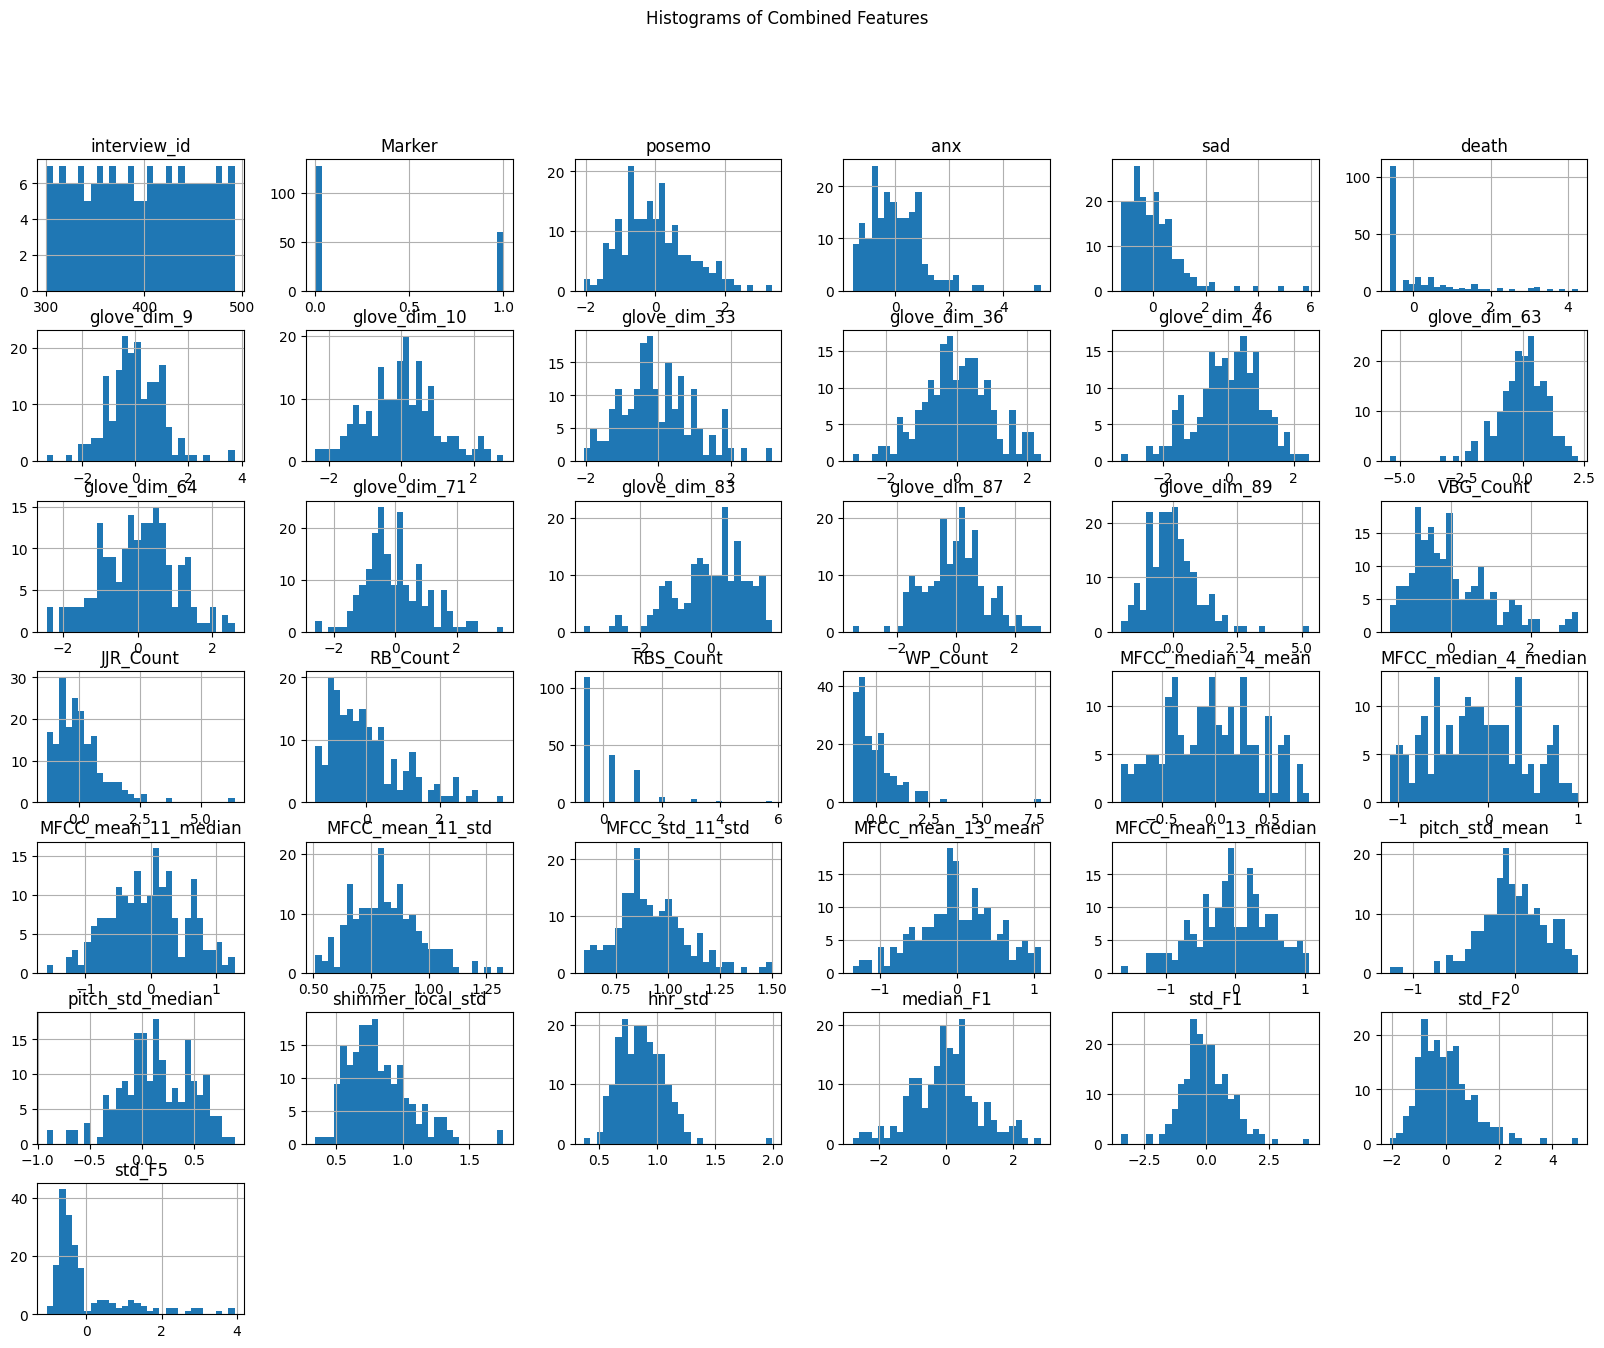

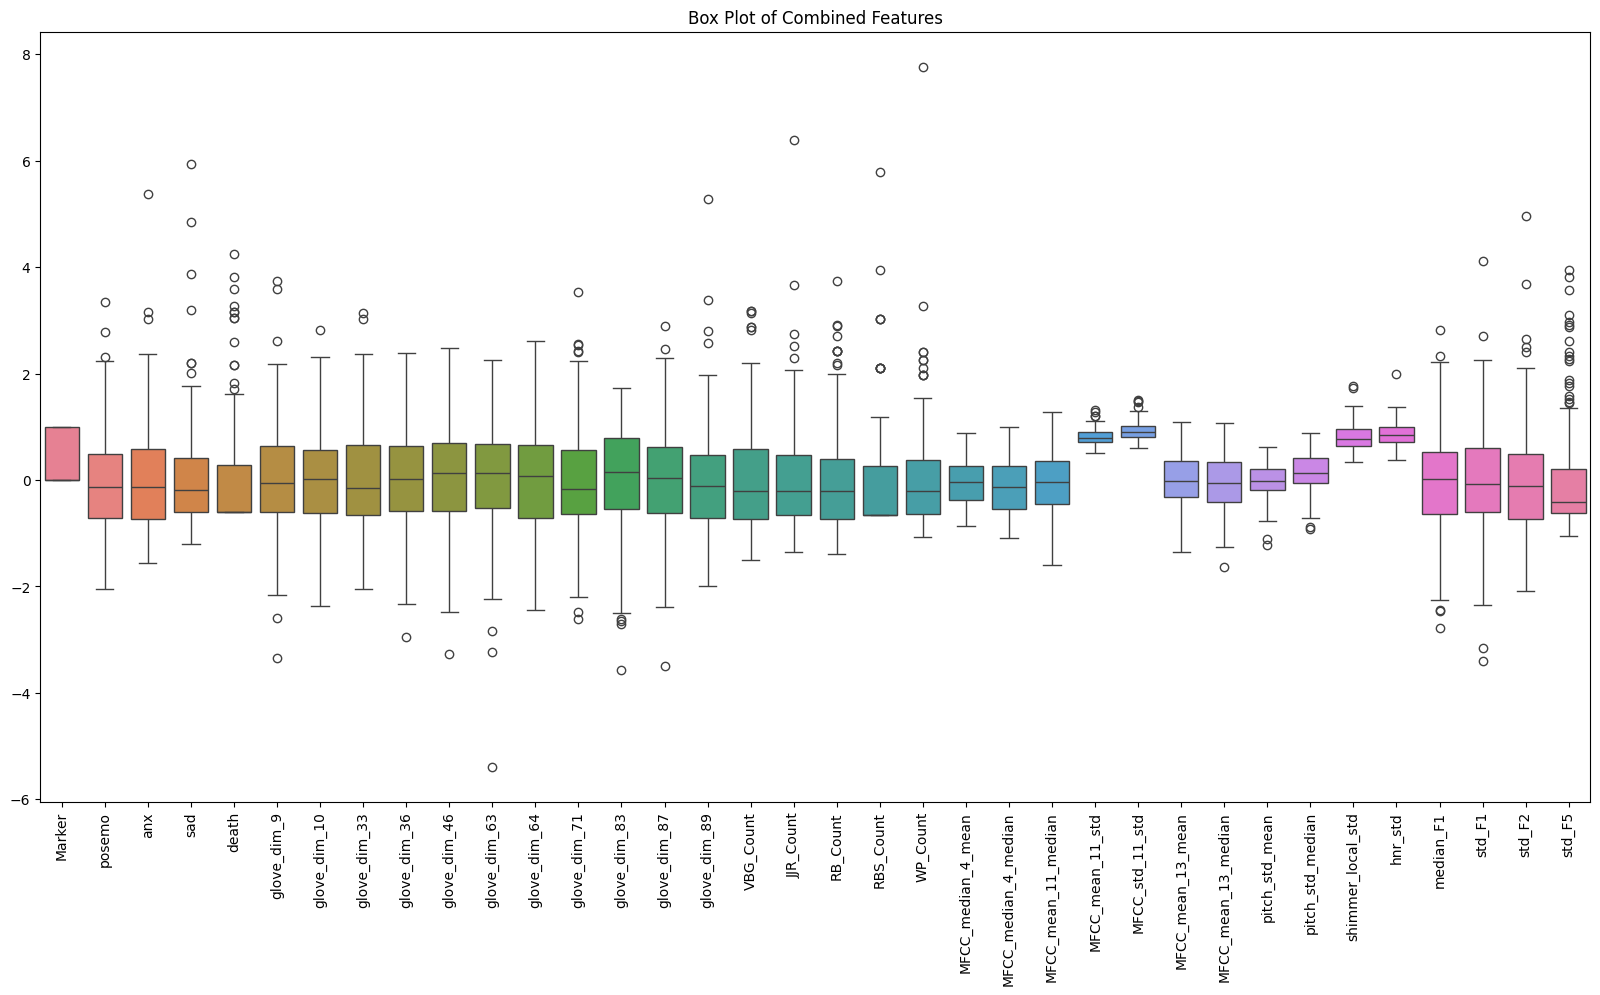

In [ ]:
# Define merged_df as one of the 3 combined sets
merged_df = merged_df_15a_20t

# Summary Statistics
print(merged_df.describe())

# Histograms for all features
merged_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Combined Features')
plt.show()

merged_df.drop('interview_id', axis=1, inplace=True)

# Box Plots for all features
plt.figure(figsize=(20, 10))
sns.boxplot(data=merged_df)
plt.xticks(rotation=90)
plt.title('Box Plot of Combined Features')
plt.show()

# Modeling:

In [ ]:
## Comment out the respective code block, based on the desired dataframe  --at the moment the merged df with the 15 acoustic and 20 textual features is running

# Modeling based on the merged_df_15a_20t dataframe:
# Exclude non-feature columns
combined_features = [col for col in merged_df_15a_20t.columns if col not in ('interview_id', 'Marker')]

X = merged_df_15a_20t[combined_features].values # features
y = merged_df_15a_20t['Marker'].values  # target label

# Modeling based on the merged_df_10a_20t dataframe:
"""
combined_features = [col for col in merged_df_10a_20t.columns if col not in ('interview_id', 'Marker')]

X = merged_df_10a_20t[combined_features].values
y = merged_df_10a_20t['Marker'].values
"""

# Modeling based on the merged_df_15a_15t dataframe:
"""
combined_features = [col for col in merged_df_15a_15t.columns if col not in ('interview_id', 'Marker')]

X = merged_df_15a_15t[combined_features].values
y = merged_df_15a_15t['Marker'].values
"""


# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Re-scaling the features
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
"""

# Evaluation Function for Logistic Regression
def evaluate_log_reg(feature_subset):
    model = LogisticRegression(max_iter=1000, penalty='l2', C=0.01)  # L2 regularization with a strong regularization
    y_pred = cross_val_predict(model, X[:, feature_subset], y, cv=kfold)
    report = classification_report(y, y_pred)
    cv_scores_auc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='accuracy')
    print_evaluation_results("Logistic Regression", feature_subset, cv_scores_auc, cv_scores_acc, report)

# Evaluation Function for SVM
def evaluate_svm(feature_subset):
    model = SVC(kernel='linear', probability=True, C=1.0)  # Default C value, adjust as needed
    y_pred = cross_val_predict(model, X[:, feature_subset], y, cv=kfold, method='predict_proba')
    report = classification_report(y, np.argmax(y_pred, axis=1))
    cv_scores_auc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='accuracy')
    print_evaluation_results("SVM", feature_subset, cv_scores_auc, cv_scores_acc, report)

# Evaluation Function for Random Forest
def evaluate_rf(feature_subset):
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Default settings, adjust as needed
    y_pred = cross_val_predict(model, X[:, feature_subset], y, cv=kfold)
    report = classification_report(y, y_pred)
    cv_scores_auc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='accuracy')
    print_evaluation_results("Random Forest", feature_subset, cv_scores_auc, cv_scores_acc, report)


# Function to create the Keras model with dropout for regularization
def create_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Adjusted Evaluation Function for Dense Layers
def evaluate_dense_layers(feature_indices):
    X_subset = X[:, feature_indices]
    y_array = y

    # Create model
    model = KerasClassifier(model=lambda: create_model(X_subset.shape[1]), epochs=50, batch_size=32, verbose=0)

    # Cross-validated predictions
    y_pred_probs = cross_val_predict(model, X_subset, y_array, cv=kfold, method='predict_proba')
    y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)

    # Classification report
    report = classification_report(y_array, y_pred)

    # AUC and accuracy scores
    cv_scores_auc = cross_val_score(model, X_subset, y_array, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X_subset, y_array, cv=kfold, scoring='accuracy')

    print_evaluation_results("Dense Layers", feature_indices, cv_scores_auc, cv_scores_acc, report)


# Utility function to print evaluation results
def print_evaluation_results(model_name, feature_subset, cv_scores_auc, cv_scores_acc, report):
    print(f"{model_name} - Features: {len(feature_subset)}")
    print(f"Mean CV AUC-ROC: {np.mean(cv_scores_auc):.4f}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores_acc):.4f}\n")
    print(f"Classification Report:\n{report}")

# Select a subset of features based on index. For simplicity, all features are used here.
all_feature_indices = np.arange(len(combined_features))

# Function usage
evaluate_log_reg(all_feature_indices)
evaluate_svm(all_feature_indices)
evaluate_rf(all_feature_indices)
evaluate_dense_layers(all_feature_indices)

Logistic Regression - Features: 35
Mean CV AUC-ROC: 0.8559
Mean CV Accuracy: 0.7127

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       128
           1       1.00      0.10      0.18        60

    accuracy                           0.71       188
   macro avg       0.85      0.55      0.50       188
weighted avg       0.80      0.71      0.62       188

SVM - Features: 35
Mean CV AUC-ROC: 0.9280
Mean CV Accuracy: 0.8617

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       128
           1       0.85      0.75      0.80        60

    accuracy                           0.88       188
   macro avg       0.87      0.84      0.85       188
weighted avg       0.88      0.88      0.88       188

Random Forest - Features: 35
Mean CV AUC-ROC: 0.8445
Mean CV Accuracy: 0.7980

Classification Report:
              precision    recall  f1-score 

Testing LogReg w/o regularization:

In [ ]:
## Experimenting on Logistic Regression without the L2 Regularization step

# Assume X, y and K-fold values from the previous script

# Evaluation Function for Logistic Regression
def evaluate_logreg(feature_subset):
    model = LogisticRegression(max_iter=1000)
    y_pred = cross_val_predict(model, X[:, feature_subset], y, cv=kfold)
    report = classification_report(y, y_pred)
    cv_scores_auc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='accuracy')
    print_evaluation_results("Logistic Regression", feature_subset, cv_scores_auc, cv_scores_acc, report)

def print_evaluation_results(model_name, feature_subset, cv_scores_auc, cv_scores_acc, report):
    print(f"{model_name} - Features: {len(feature_subset)}")
    print(f"Mean CV AUC-ROC: {np.mean(cv_scores_auc):.4f}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores_acc):.4f}\n")
    print(f"Classification Report:\n{report}")

# Select a subset of features based on index. For simplicity, all features are used here.
all_feature_indices = np.arange(len(combined_features))

# Usage
evaluate_logreg(all_feature_indices)

Logistic Regression - Features: 35
Mean CV AUC-ROC: 0.9112
Mean CV Accuracy: 0.8514

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       128
           1       0.77      0.77      0.77        60

    accuracy                           0.85       188
   macro avg       0.83      0.83      0.83       188
weighted avg       0.85      0.85      0.85       188



# Overfitting check:

In [ ]:
## Logistic Regression overfitting check:

# Assume that X (features) and y (labels) are the same as the ones that have been commented out on the above scripts
# Similarly for the K-fold Cross Validator

# Adjusted Logistic Regression Evaluation Function
def evaluate_feature_subset_lr_per_fold(X, y):
    #model = LogisticRegression(max_iter=1000)
    model = LogisticRegression(max_iter=1000, penalty='l2', C=0.01)

    # Using cross_validate to get scores for each fold, including training scores
    cv_results = cross_validate(model, X, y, cv=kfold, scoring=['roc_auc', 'accuracy'], return_train_score=True)

    # Printing scores for each fold
    print(f"Logistic Regression - Features: {X.shape[1]}")
    for i in range(kfold.n_splits):
        print(f"Fold {i+1} - Train ROC-AUC: {cv_results['train_roc_auc'][i]:.4f}, Test ROC-AUC: {cv_results['test_roc_auc'][i]:.4f}")
        print(f"Fold {i+1} - Train Accuracy: {cv_results['train_accuracy'][i]:.4f}, Test Accuracy: {cv_results['test_accuracy'][i]:.4f}")

    # Averaging scores across all folds for a summary
    print(f"\nMean CV Train ROC-AUC: {np.mean(cv_results['train_roc_auc']):.4f}")
    print(f"Mean CV Test ROC-AUC: {np.mean(cv_results['test_roc_auc']):.4f}")
    print(f"Mean CV Train Accuracy: {np.mean(cv_results['train_accuracy']):.4f}")
    print(f"Mean CV Test Accuracy: {np.mean(cv_results['test_accuracy']):.4f}\n")

# Evaluate Logistic Regression with all combined features
evaluate_feature_subset_lr_per_fold(X, y)

Logistic Regression - Features: 35
Fold 1 - Train ROC-AUC: 0.9283, Test ROC-AUC: 0.8333
Fold 1 - Train Accuracy: 0.7600, Test Accuracy: 0.7105
Fold 2 - Train ROC-AUC: 0.9312, Test ROC-AUC: 0.8077
Fold 2 - Train Accuracy: 0.7467, Test Accuracy: 0.7105
Fold 3 - Train ROC-AUC: 0.9154, Test ROC-AUC: 0.9487
Fold 3 - Train Accuracy: 0.7133, Test Accuracy: 0.7368
Fold 4 - Train ROC-AUC: 0.9171, Test ROC-AUC: 0.8600
Fold 4 - Train Accuracy: 0.7086, Test Accuracy: 0.6757
Fold 5 - Train ROC-AUC: 0.9092, Test ROC-AUC: 0.8300
Fold 5 - Train Accuracy: 0.7483, Test Accuracy: 0.7297

Mean CV Train ROC-AUC: 0.9202
Mean CV Test ROC-AUC: 0.8559
Mean CV Train Accuracy: 0.7354
Mean CV Test Accuracy: 0.7127



In [ ]:
## SVM overfitting check:

# Assume that X (features) and y (labels) are the same as the ones that have been commented out on the above scripts
# Similarly for the K-fold Cross Validator

# Adjusted Logistic Regression Evaluation Function
def evaluate_feature_subset_svm_per_fold(X, y):
    model = SVC(kernel='linear', probability=True, C=1.0)  # Default C value, adjust as needed

    # Using cross_validate to get scores for each fold, including training scores
    cv_results = cross_validate(model, X, y, cv=kfold, scoring=['roc_auc', 'accuracy'], return_train_score=True)

    # Printing scores for each fold
    print(f"SVM - Features: {X.shape[1]}")
    for i in range(kfold.n_splits):
        print(f"Fold {i+1} - Train ROC-AUC: {cv_results['train_roc_auc'][i]:.4f}, Test ROC-AUC: {cv_results['test_roc_auc'][i]:.4f}")
        print(f"Fold {i+1} - Train Accuracy: {cv_results['train_accuracy'][i]:.4f}, Test Accuracy: {cv_results['test_accuracy'][i]:.4f}")

    # Averaging scores across all folds for a summary
    print(f"\nMean CV Train ROC-AUC: {np.mean(cv_results['train_roc_auc']):.4f}")
    print(f"Mean CV Test ROC-AUC: {np.mean(cv_results['test_roc_auc']):.4f}")
    print(f"Mean CV Train Accuracy: {np.mean(cv_results['train_accuracy']):.4f}")
    print(f"Mean CV Test Accuracy: {np.mean(cv_results['test_accuracy']):.4f}\n")

# Evaluate Logistic Regression with all combined features
evaluate_feature_subset_svm_per_fold(X, y)

SVM - Features: 35
Fold 1 - Train ROC-AUC: 0.9810, Test ROC-AUC: 0.9071
Fold 1 - Train Accuracy: 0.9400, Test Accuracy: 0.8684
Fold 2 - Train ROC-AUC: 0.9804, Test ROC-AUC: 0.9167
Fold 2 - Train Accuracy: 0.9400, Test Accuracy: 0.8684
Fold 3 - Train ROC-AUC: 0.9865, Test ROC-AUC: 0.9295
Fold 3 - Train Accuracy: 0.9600, Test Accuracy: 0.8421
Fold 4 - Train ROC-AUC: 0.9733, Test ROC-AUC: 0.9367
Fold 4 - Train Accuracy: 0.9536, Test Accuracy: 0.8378
Fold 5 - Train ROC-AUC: 0.9682, Test ROC-AUC: 0.9500
Fold 5 - Train Accuracy: 0.9404, Test Accuracy: 0.8919

Mean CV Train ROC-AUC: 0.9779
Mean CV Test ROC-AUC: 0.9280
Mean CV Train Accuracy: 0.9468
Mean CV Test Accuracy: 0.8617



In [ ]:
## Random Forest overfitting check:

# Assume that X (features) and y (labels) are the same as the ones that have been commented out on the above scripts
# Similarly, for the K-fold Cross Validator

# Adjusted Logistic Regression Evaluation Function
def evaluate_feature_subset_rf_per_fold(X, y):
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Default settings, adjust as needed

    # Using cross_validate to get scores for each fold, including training scores
    cv_results = cross_validate(model, X, y, cv=kfold, scoring=['roc_auc', 'accuracy'], return_train_score=True)

    # Printing scores for each fold
    print(f"Random Forest - Features: {X.shape[1]}")
    for i in range(kfold.n_splits):
        print(f"Fold {i+1} - Train ROC-AUC: {cv_results['train_roc_auc'][i]:.4f}, Test ROC-AUC: {cv_results['test_roc_auc'][i]:.4f}")
        print(f"Fold {i+1} - Train Accuracy: {cv_results['train_accuracy'][i]:.4f}, Test Accuracy: {cv_results['test_accuracy'][i]:.4f}")

    # Averaging scores across all folds for a summary
    print(f"\nMean CV Train ROC-AUC: {np.mean(cv_results['train_roc_auc']):.4f}")
    print(f"Mean CV Test ROC-AUC: {np.mean(cv_results['test_roc_auc']):.4f}")
    print(f"Mean CV Train Accuracy: {np.mean(cv_results['train_accuracy']):.4f}")
    print(f"Mean CV Test Accuracy: {np.mean(cv_results['test_accuracy']):.4f}\n")

# Evaluate Logistic Regression with all combined features
evaluate_feature_subset_rf_per_fold(X, y)

Random Forest - Features: 35
Fold 1 - Train ROC-AUC: 1.0000, Test ROC-AUC: 0.8285
Fold 1 - Train Accuracy: 1.0000, Test Accuracy: 0.8421
Fold 2 - Train ROC-AUC: 1.0000, Test ROC-AUC: 0.7837
Fold 2 - Train Accuracy: 1.0000, Test Accuracy: 0.7105
Fold 3 - Train ROC-AUC: 1.0000, Test ROC-AUC: 0.9519
Fold 3 - Train Accuracy: 1.0000, Test Accuracy: 0.8158
Fold 4 - Train ROC-AUC: 1.0000, Test ROC-AUC: 0.8533
Fold 4 - Train Accuracy: 1.0000, Test Accuracy: 0.7838
Fold 5 - Train ROC-AUC: 1.0000, Test ROC-AUC: 0.8050
Fold 5 - Train Accuracy: 1.0000, Test Accuracy: 0.8378

Mean CV Train ROC-AUC: 1.0000
Mean CV Test ROC-AUC: 0.8445
Mean CV Train Accuracy: 1.0000
Mean CV Test Accuracy: 0.7980



# Grid Search:

RF - GridSearch

In [ ]:
# Assume that X (features) and y (labels) are the same as the ones that have been commented out on the previous scripts

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # Number of folds in cross-validation
                           n_jobs=-1, # Use all available cores
                           scoring='accuracy', # Scoring metric
                           verbose=1) # Show progress

# Fit the grid search to the data
grid_search.fit(X, y)

# Best parameter set
print('Best parameters found: ', grid_search.best_params_)

# Best score
print('Best score: ', grid_search.best_score_)

# Use the best estimator directly
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best score:  0.7816500711237553


In [ ]:
## RF with GridSearch settings

# Assume that X (features) and y (labels) are the same as the ones that have been commented out on the previous scripts
# Similarly for the K-fold Cross Validator

# Evaluation Function for Random Forest
def evaluate_random_forest(feature_subset):
    model = RandomForestClassifier(max_depth = 10, min_samples_split=10, n_estimators=300, random_state=42)  # GridSearch settings
    y_pred = cross_val_predict(model, X[:, feature_subset], y, cv=kfold)
    report = classification_report(y, y_pred)
    cv_scores_auc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='accuracy')
    print_evaluation_results("Random Forest", feature_subset, cv_scores_auc, cv_scores_acc, report)


# Utility function to print evaluation results
def print_evaluation_results(model_name, feature_subset, cv_scores_auc, cv_scores_acc, report):
    print(f"{model_name} - Features: {len(feature_subset)}")
    print(f"Mean CV AUC-ROC: {np.mean(cv_scores_auc):.4f}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores_acc):.4f}\n")
    print(f"Classification Report:\n{report}")

# Select a subset of features based on index. For simplicity, all features are used here.
all_feature_indices = np.arange(len(combined_features))

# Usage
evaluate_random_forest(all_feature_indices)

Random Forest - Features: 35
Mean CV AUC-ROC: 0.8397
Mean CV Accuracy: 0.8192

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       128
           1       0.86      0.52      0.65        60

    accuracy                           0.82       188
   macro avg       0.84      0.74      0.76       188
weighted avg       0.83      0.82      0.80       188



SVM - GridSearch

In [ ]:
# Assume that X (features) and y (labels) are the same as the ones that have been commented out on the previous scripts

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly']  # Specifies the kernel type to be used in the algorithm
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           cv=5,  # Number of folds in cross-validation
                           scoring='accuracy',  # Scoring metric
                           verbose=1)  # Show progress

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print('Best parameters found:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Use the best estimator for predictions or further analysis
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8560455192034139


In [ ]:
## SVM with GridSearch settings:

# Assume that X (features) and y (labels) are the same as the ones that have been commented out on the previous scripts
# Similarly for the K-fold Cross Validator

# Evaluation Function for SVM
def evaluate_svm(feature_subset):
    model = SVC(kernel='linear', probability=True, C=1.0, gamma="scale")  # Default C value, adjust as needed
    y_pred = cross_val_predict(model, X[:, feature_subset], y, cv=kfold, method='predict_proba')
    report = classification_report(y, np.argmax(y_pred, axis=1))
    cv_scores_auc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='accuracy')
    print_evaluation_results("SVM", feature_subset, cv_scores_auc, cv_scores_acc, report)

# Utility function to print evaluation results
def print_evaluation_results(model_name, feature_subset, cv_scores_auc, cv_scores_acc, report):
    print(f"{model_name} - Features: {len(feature_subset)}")
    print(f"Mean CV AUC-ROC: {np.mean(cv_scores_auc):.4f}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores_acc):.4f}\n")
    print(f"Classification Report:\n{report}")

# Select a subset of features based on index. For simplicity, all features are used here.
all_feature_indices = np.arange(len(combined_features))

# Usage
evaluate_svm(all_feature_indices)

SVM - Features: 35
Mean CV AUC-ROC: 0.9280
Mean CV Accuracy: 0.8617

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       128
           1       0.86      0.72      0.78        60

    accuracy                           0.87       188
   macro avg       0.87      0.83      0.85       188
weighted avg       0.87      0.87      0.87       188



# Visualizations:

In [ ]:
## Re-define which merged dataframe will be used for visualization

combined_features = [col for col in merged_df_10a_20t.columns if col not in ('interview_id', 'Marker')]

X = merged_df_10a_20t[combined_features].values
y = merged_df_10a_20t['Marker'].values

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Confusion Matrix Function predefined:

In [ ]:
# Function that plots CM
def plot_simple_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

LogReg - Confusion matrix

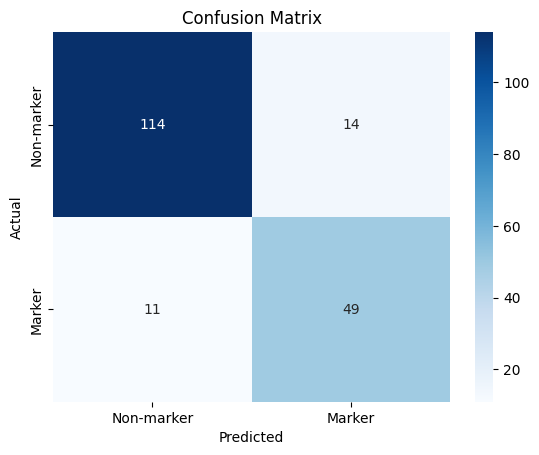

In [ ]:
def evaluate_logistic_regression(feature_subset):
    model = LogisticRegression(random_state=42)
    y_pred = cross_val_predict(model, X[:, feature_subset], y, cv=kfold)
    report = classification_report(y, y_pred)
    #print("Classification Report:\n", report)
    return y_pred


# After evaluating Logistic Regression
all_feature_indices = np.arange(len(combined_features))
y_pred_lr = evaluate_logistic_regression(all_feature_indices)

class_names = ['Non-marker', 'Marker']
plot_simple_confusion_matrix(y, y_pred_lr, class_names)

Dense Layers - Confusion Matrix

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed 

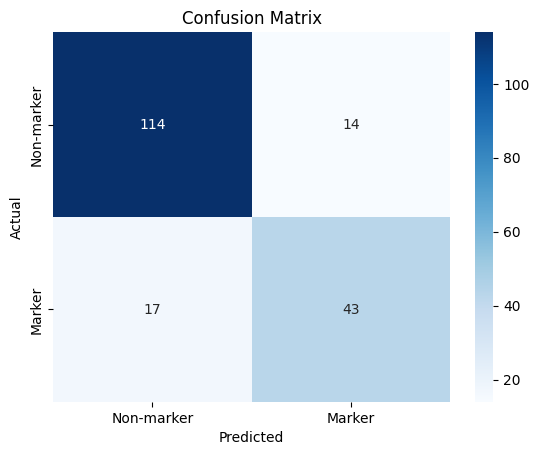

In [ ]:
def create_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=lambda: create_model(X.shape[1]), epochs=50, batch_size=10, verbose=0)

# Using StratifiedKFold for cross-validation
y_pred_dl = cross_val_predict(model, X, y, cv=kfold, method='predict')
y_pred_dl = (y_pred_dl > 0.5).astype(int)  # Convert probabilities to binary outputs

# Use the same plotting function
class_names = ['Non-marker', 'Marker']
plot_simple_confusion_matrix(y, y_pred_dl, class_names)

SVM - Confusion matrix

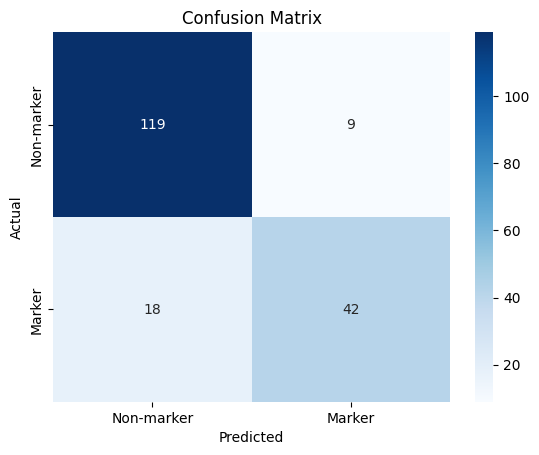

In [ ]:
def evaluate_svm(feature_subset):
    model = SVC(kernel='linear', probability=True, C=1.0)  # Default C value, adjust as needed
    y_pred_proba = cross_val_predict(model, X[:, feature_subset], y, cv=kfold, method='predict_proba')
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels
    report = classification_report(y, y_pred)
    cv_scores_auc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='accuracy')
    return y_pred  # Return class labels for confusion matrix plotting

# After evaluating SVM
all_feature_indices = np.arange(len(combined_features))
y_pred = evaluate_svm(all_feature_indices)

class_names = ['Non-marker', 'Marker']
plot_simple_confusion_matrix(y, y_pred, class_names)

Random Forest - Confusion Matrix

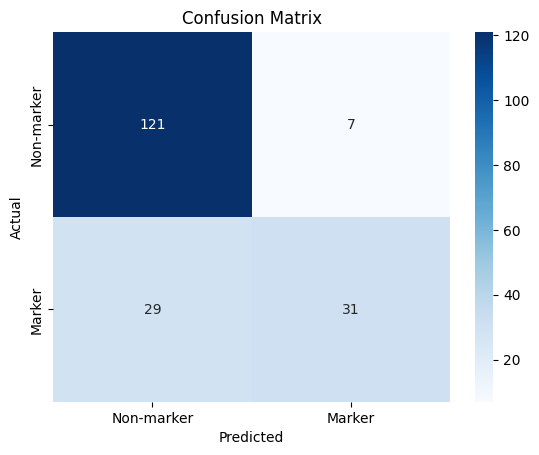

In [ ]:
def evaluate_random_forest(feature_subset):
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Default settings, adjust as needed
    y_pred_proba = cross_val_predict(model, X[:, feature_subset], y, cv=kfold, method='predict_proba')
    y_pred_rf = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels
    report = classification_report(y, y_pred_rf)
    cv_scores_auc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='roc_auc')
    cv_scores_acc = cross_val_score(model, X[:, feature_subset], y, cv=kfold, scoring='accuracy')
    return y_pred_rf

# After evaluating RF
all_feature_indices = np.arange(len(combined_features))
y_pred_rf = evaluate_random_forest(all_feature_indices)  # Store the predictions returned by the function

class_names = ['Non-marker', 'Marker']  # Update as appropriate for your data
plot_simple_confusion_matrix(y, y_pred_rf, class_names)

SVM - ROC Curve and AUC Score

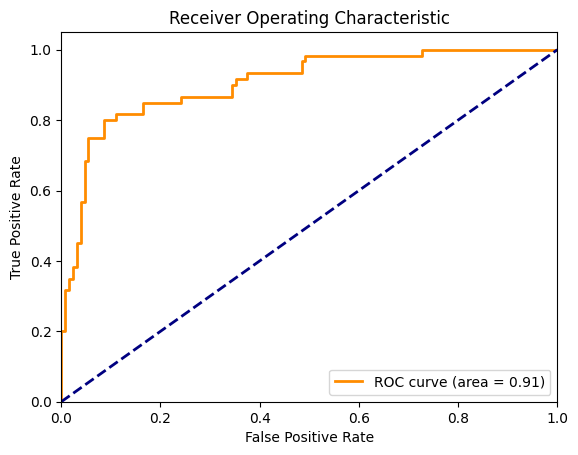

In [ ]:
def evaluate_svm(feature_subset):
    model = SVC(kernel='linear', probability=True, C=1.0)
    # Get probabilities
    y_proba = cross_val_predict(model, X[:, feature_subset], y, cv=kfold, method='predict_proba')
    # No need to convert to labels here; handle that in the plotting or metric calculation
    return y_proba

# ROC curve plot function defined here for all models
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Get probabilities from SVM evaluation
y_proba = evaluate_svm(all_feature_indices)
# Assuming the positive class is the second column, adjust if necessary
y_scores_for_positive_class = y_proba[:, 1]

# Plot the ROC curve using the updated y_scores_for_positive_class
plot_roc_curve(y, y_scores_for_positive_class)

SVM - Precision, Recall Curve

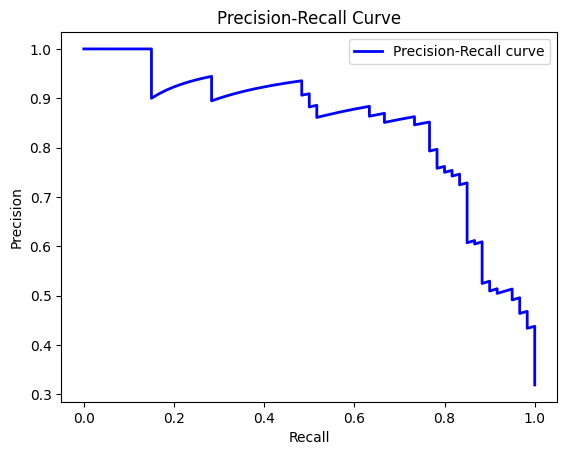

In [ ]:
# Precision - Recall curve plot function defined here for all models
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()

y_proba = evaluate_svm(all_feature_indices)
# Assuming the positive class is the second column, adjust if necessary
y_scores_for_positive_class = y_proba[:, 1]

# Usage
plot_precision_recall_curve(y, y_scores_for_positive_class)

Random Forest - - ROC Curve and AUC Score

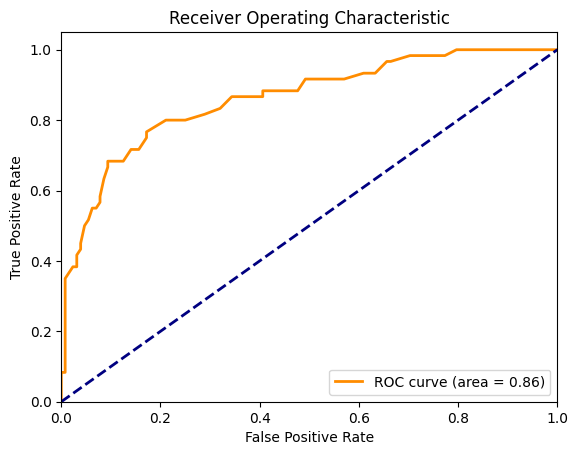

In [ ]:
def evaluate_random_forest(feature_subset):
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Default settings, adjust as needed
    y_proba = cross_val_predict(model, X[:, feature_subset], y, cv=kfold, method='predict_proba')
    return y_proba

# Get probabilities from SVM evaluation
y_proba = evaluate_random_forest(all_feature_indices)
# Assuming the positive class is the second column, adjust if necessary
y_scores_for_positive_class = y_proba[:, 1]

# Now plot the ROC curve using the updated y_scores_for_positive_class
plot_roc_curve(y, y_scores_for_positive_class)

Random Forest - Precision, Recall Curve

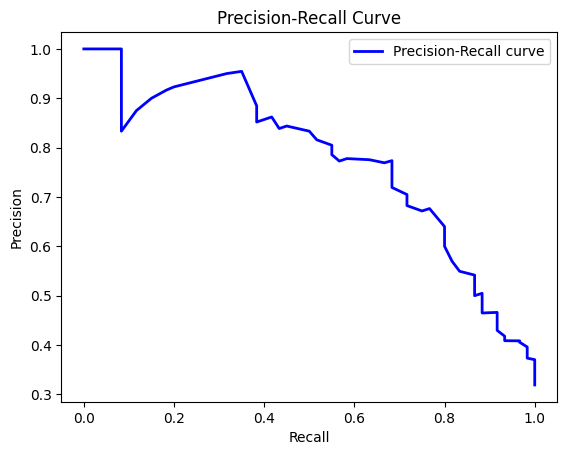

In [ ]:
# Using the predefined function
y_proba = evaluate_random_forest(all_feature_indices)
y_scores_for_positive_class = y_proba[:, 1]

# usage
plot_precision_recall_curve(y, y_scores_for_positive_class)

20t, 10a features - Correlation Matrix

                        death  glove_dim_9  glove_dim_36  glove_dim_64  \
Marker               0.301934    -0.357667           NaN           NaN   
posemo                    NaN          NaN           NaN           NaN   
sad                       NaN          NaN      0.342128           NaN   
glove_dim_9               NaN          NaN      0.409160     -0.614418   
glove_dim_10              NaN          NaN           NaN           NaN   
glove_dim_33              NaN          NaN           NaN           NaN   
glove_dim_63              NaN          NaN           NaN           NaN   
glove_dim_64              NaN          NaN           NaN           NaN   
glove_dim_71              NaN          NaN           NaN           NaN   
glove_dim_83              NaN          NaN           NaN           NaN   
glove_dim_87              NaN          NaN           NaN           NaN   
glove_dim_89              NaN          NaN           NaN           NaN   
VBG_Count                 NaN         

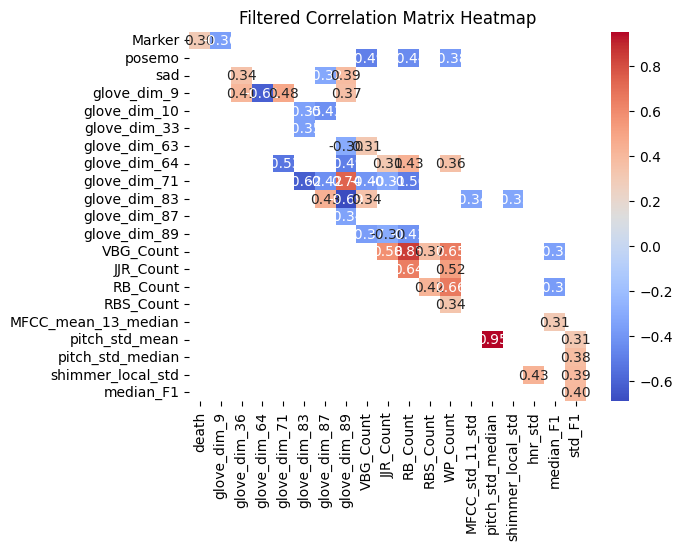

In [ ]:
# Correlation plot function defined here for all different sets of features
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    # Filter for correlations greater than 0.5 (ignoring the diagonal)
    high_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    filtered_corr = high_corr[high_corr.abs() > 0.3]
    print(filtered_corr.dropna(axis=0, how='all').dropna(axis=1, how='all'))
    # Plotting only the filtered correlation matrix
    sns.heatmap(filtered_corr.dropna(axis=0, how='all').dropna(axis=1, how='all'), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Filtered Correlation Matrix Heatmap')
    plt.show()

# Usage
plot_correlation_matrix(merged_df_10a_20t)

20t, 15a features - Correlation Matrix

                    glove_dim_64  glove_dim_71  glove_dim_83  glove_dim_89  \
glove_dim_9            -0.614418           NaN           NaN           NaN   
glove_dim_64                 NaN     -0.532061           NaN           NaN   
glove_dim_71                 NaN           NaN     -0.623226      0.735529   
glove_dim_83                 NaN           NaN           NaN     -0.689891   
VBG_Count                    NaN           NaN           NaN           NaN   
JJR_Count                    NaN           NaN           NaN           NaN   
RB_Count                     NaN           NaN           NaN           NaN   
MFCC_median_4_mean           NaN           NaN           NaN           NaN   
MFCC_mean_13_mean            NaN           NaN           NaN           NaN   
pitch_std_mean               NaN           NaN           NaN           NaN   
std_F2                       NaN           NaN           NaN           NaN   

                    JJR_Count  RB_Count  WP_Count  MFCC_median_

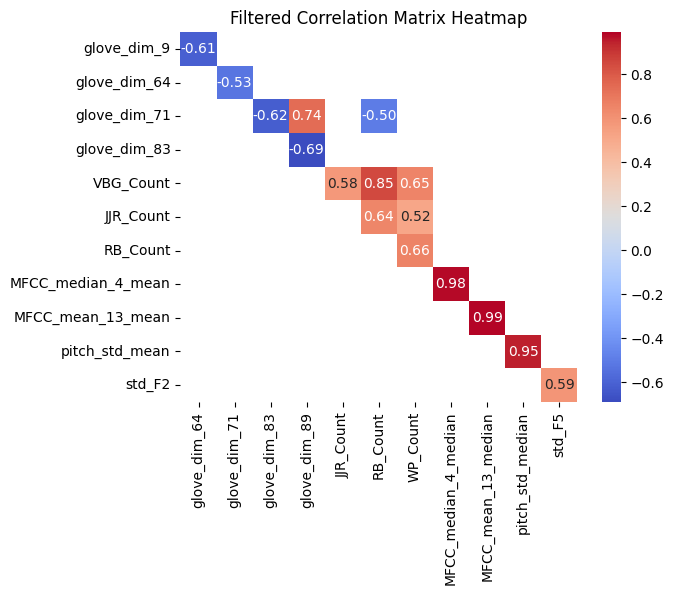

In [ ]:
# Usage
plot_correlation_matrix(merged_df_15a_20t)

15t, 15a features - Correlation Matrix

                    glove_dim_64  glove_dim_71  JJR_Count  RB_Count  WP_Count  \
glove_dim_9            -0.614418           NaN        NaN       NaN       NaN   
glove_dim_64                 NaN     -0.532061        NaN       NaN       NaN   
glove_dim_71                 NaN           NaN        NaN -0.502597       NaN   
VBG_Count                    NaN           NaN   0.576482  0.846997  0.654991   
JJR_Count                    NaN           NaN        NaN  0.644418  0.517187   
RB_Count                     NaN           NaN        NaN       NaN  0.659271   
MFCC_median_4_mean           NaN           NaN        NaN       NaN       NaN   
MFCC_mean_13_mean            NaN           NaN        NaN       NaN       NaN   
pitch_std_mean               NaN           NaN        NaN       NaN       NaN   
std_F2                       NaN           NaN        NaN       NaN       NaN   

                    MFCC_median_4_median  MFCC_mean_13_median  \
glove_dim_9                          NaN   

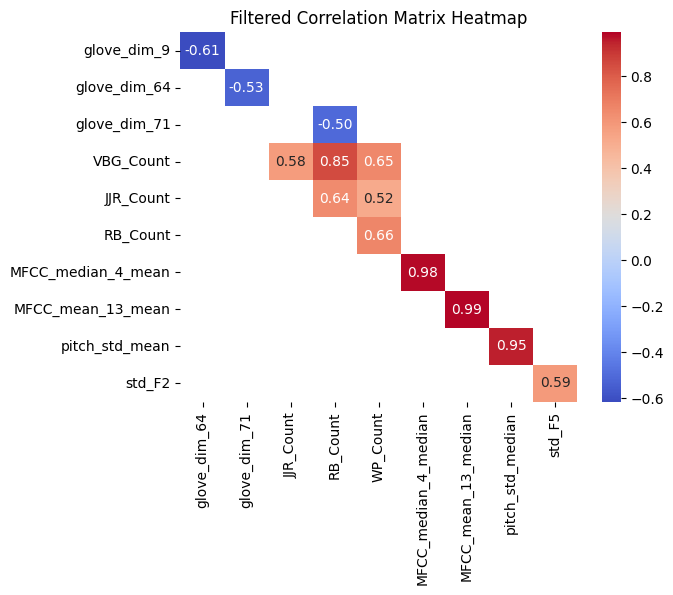

In [ ]:
# Usage
plot_correlation_matrix(merged_df_15a_15t)

# Qualitative Error Analysis:

In [ ]:
# Identifying false predictions:

# Assuming X and y are already defined as NumPy arrays
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(kernel='linear', probability=True, C=1.0)

# Placeholder for detailed fold results including incorrect predictions
detailed_fold_results = []

for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Assuming you want to store probabilities for some reason

    # Determine incorrect predictions
    incorrect_indices = np.where(y_pred != y_test)[0]
    incorrect_predictions = {
        'indices': test_index[incorrect_indices],
        'y_true': y_test[incorrect_indices],
        'y_pred': y_pred[incorrect_indices]
    }

    # Store detailed results
    detailed_fold_results.append({
        'y_true': y_test,
        'y_pred': y_pred,
        'y_prob': y_prob,  # Only if you need probabilities
        'incorrect_predictions': incorrect_predictions
    })

# Iterate through each fold's results in detailed_fold_results
for i, fold_result in enumerate(detailed_fold_results, start=1):
    incorrect_preds = fold_result['incorrect_predictions']
    print(f"Incorrect Predictions in Fold {i}:")
    print("Index\tTrue\tPredicted")

    # Check if there are incorrect predictions
    if len(incorrect_preds['indices']) > 0:
        for idx, true, pred in zip(incorrect_preds['indices'], incorrect_preds['y_true'], incorrect_preds['y_pred']):
            print(f"{idx}\t{true}\t{pred}")
    else:
        print("No incorrect predictions for this fold.")
    print()  # newline for better readability between folds

Incorrect Predictions in Fold 1:
Index	True	Predicted
22	0	1
46	1	0
96	1	0
128	0	1
180	0	1

Incorrect Predictions in Fold 2:
Index	True	Predicted
4	0	1
70	0	1
86	1	0
158	1	0
166	1	0

Incorrect Predictions in Fold 3:
Index	True	Predicted
43	0	1
77	1	0
82	1	0
143	0	1
151	0	1
159	0	1

Incorrect Predictions in Fold 4:
Index	True	Predicted
3	1	0
29	1	0
47	1	0
110	1	0
113	1	0
187	1	0

Incorrect Predictions in Fold 5:
Index	True	Predicted
27	1	0
73	0	1
109	0	1

